# ISSAC PYNQ-Z1 Hardware Image Generator

Server Setup

In [1]:
Wait to be loaded

Import the overlay with initial setting(Only run this cell once)

In [1]:
from pynq import Overlay
from pynq.lib.video import *
overlay = Overlay("/home/xilinx/jupyter_notebooks/base.bit")

Configure the VDMA connected to the pixel generator(Only run this cell once):

In [2]:
imgen_vdma = overlay.video.axi_vdma_0.readchannel
pixgen = overlay.pixel_generator_0
X_SIZE = pixgen.register_map.gp0[31:16] ## default 640*480
Y_SIZE = pixgen.register_map.gp0[15:0]


Only run the cells below for modifying paramters(might need to store a value from the web to a register)

In [4]:
X_SIZE = pixgen.register_map.gp0[31:16] = 0x1F4 #500
Y_SIZE = pixgen.register_map.gp0[15:0] = 0x1F4 #500

In [12]:
pixgen.register_map.gp1[31:16] = 0x40 #Scale Factor

In [13]:
pixgen.register_map.gp1[15:0] = 0x64 #MAX_iteration

Start the VDMA connected to the pixel generator(Run this cell everytime parameters change):

In [6]:
videoMode = common.VideoMode(X_SIZE, Y_SIZE, 24)
imgen_vdma.mode = videoMode
imgen_vdma.start()

The frame read by the VDMA can be displayed in the notebook using PiL:

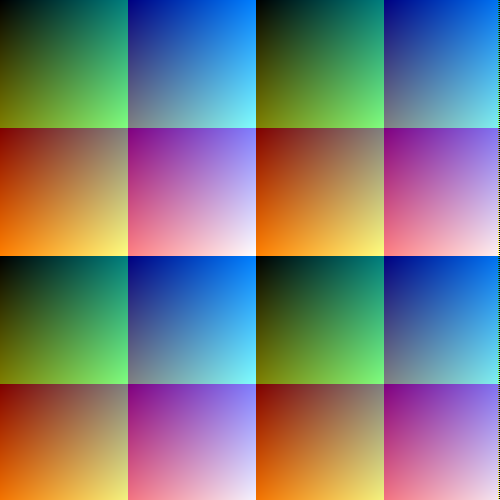

In [7]:
import PIL.Image
frame = imgen_vdma.readframe()
image = PIL.Image.fromarray(frame)
image

### HDMI Output
The HDMI output is configured and started:

In [ ]:
hdmi_out = overlay.video.hdmi_out
hdmi_out._vdma = overlay.video.axi_vdma #Use the correct VDMA!
hdmi_out.configure(videoMode)
hdmi_out.start()
hdmi_out.writeframe(frame)
## needs to display the frame rate

### Cleanup

In [ ]:
imgen_vdma.stop()
hdmi_out.close()